In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import matplotlib.pyplot as plt5
import matplotlib.pyplot as plt6
import matplotlib.pyplot as plt7
import matplotlib.pyplot as plt8

def arreglarDiscapacidad(valor):
    if str(valor) == "nan":
        return "No"
    return valor

def arreglarNulos(valor):
    if str(valor) == "nan":
        return "No especifica"
    return valor

def arreglarNacionalidad(valor):
    if str(valor) == "Otro" or str(valor)== "Sin descripcion":
        return "No especifica"
    return valor

def acusadoPorGenero(valor):
    dicc = {"Hombre": 0, "Mujer": 0, "Transexual": 0} # cambiar esto para q no este hardcodeado
    for i, v in valor["referido_tipo"].items():
        if str(valor["referido_tipo"][i]) == "Acusado":
            dicc[valor["genero"][i]] += 1
    return dicc

def victimaPorGenero(valor):
    dicc = {"Hombre": 0, "Mujer": 0, "Transexual": 0} # cambiar esto para q no este hardcodeado
    for i, v in valor["referido_tipo"].items():
        if str(valor["referido_tipo"][i]).find("Victima") == 0: #hacemos esto por lo que devuelve la funcion .find()
            dicc[valor["genero"][i]] += 1
    return dicc

def arreglarNumeros(valor):
    if str(valor)!= "nan":
        return int(valor)
    return valor


data = pd.read_csv("../data/denuncias-trata.csv", sep=',', skipinitialspace=True, engine='python')
data["discapacidad"]= data["discapacidad"].apply(arreglarDiscapacidad)
data["edad_aparente"]= data["edad_aparente"].apply(arreglarNumeros).apply(arreglarNulos)
data["provincia_indec_id"]= data["provincia_indec_id"].apply(arreglarNulos)
data["provincia"] = data["provincia"].apply(arreglarNulos)
data["localidad"] = data["localidad"].apply(arreglarNulos)
data["nacionalidad"] = data["nacionalidad"].apply(arreglarNacionalidad)
data = data.dropna()
data.to_csv('../data/denuncias-trata-nuevo.csv')


## Introducción

En el presente trabajo tomamos como referencia un dataset de denuncias
de la sección de datos del gobierno de la ciudad para realizar las siguientes conclusiones:

### Desarrollo

1- ¿Cuáles son los motivos por los que se realizan más denuncias?

Mediante la realización del siguiente gráfico, podemos observar que la gran mayoría de
las denuncias se realizan por la causa de explotación sexual, seguido de explotación laboral y
personas desaparecidas.



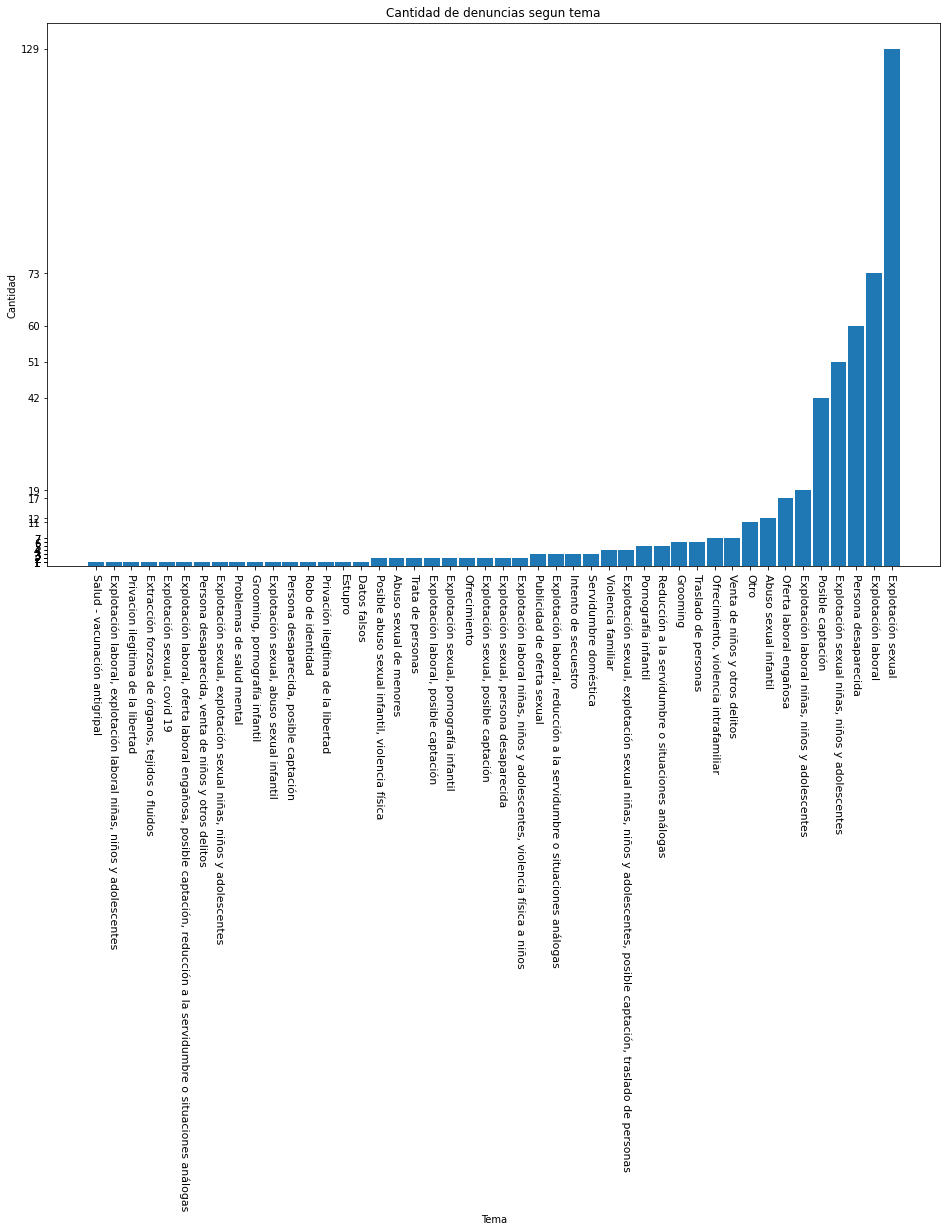

In [23]:
# Primer gráfico - Cantidad x tema
x_values = data['subtema'].value_counts().index.tolist()
y_values = data['subtema'].value_counts().tolist()
x_values= np.flip(x_values)
y_values.reverse()
plt1.figure(figsize=(16,10))
plt1.bar(x_values,y_values, width=0.9)
plt1.xticks(x_values,fontsize=11)
plt1.yticks(y_values)
plt1.title('Cantidad de denuncias segun tema')
plt1.xlabel('Tema')
plt1.ylabel('Cantidad')
plt1.xticks(rotation=270)
plt1.show()

2- ¿Cuáles son las provincias que poseen más denuncias?

El siguiente gráfico demuestra una gran densidad en las frecuencias de las denuncias en
la provincia de Buenos Aires seguido de Misiones. También podemos observar que en la
mayoría de las denuncias no se especifica la provincia, esto puede estar dado por la seguridad
y privacidad del afectado.

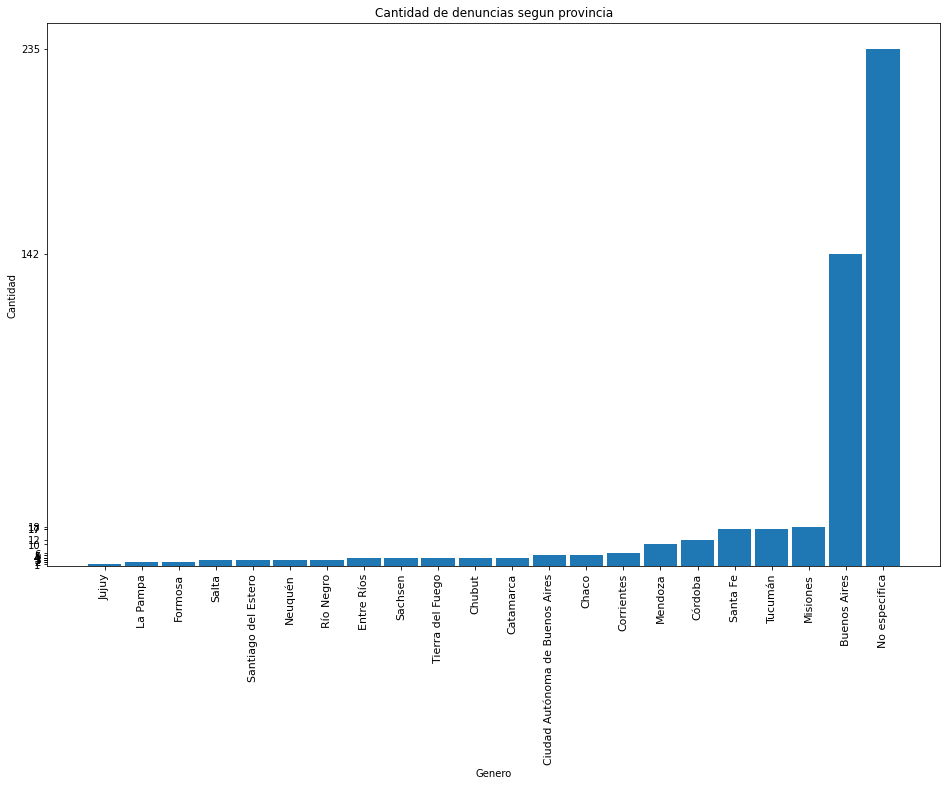

In [24]:
# Segundo gráfico - Proporcion por provincia
x_values = data['provincia'].value_counts().index.tolist()
y_values = data['provincia'].value_counts().tolist()
x_values= np.flip(x_values)
y_values.reverse()
plt3.figure(figsize=(16,10))
plt3.bar(x_values,y_values, width=0.9)
plt3.xticks(x_values,fontsize=11)
plt3.yticks(y_values)
plt3.title('Cantidad de denuncias segun provincia')
plt3.xlabel('Genero')
plt3.ylabel('Cantidad')
plt3.xticks(rotation=270)
plt3.show()


3- ¿De qué nacionalidad suelen ser las personas involucradas en las denuncias?

A partir del siguiente gráfico podemos concluir en que la mayoría de los involucrados
son de origen Argentino seguido de Paraguay, lo cual puede presentar relación
con la densidad de denuncias en Misiones.

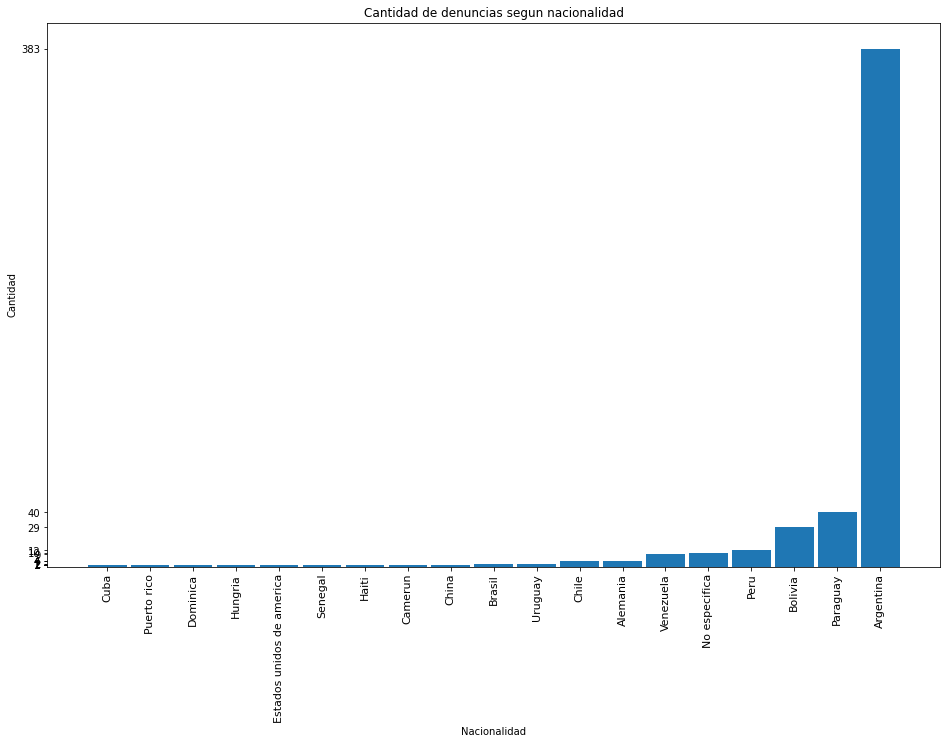

In [25]:
# Tercer gráfico - Cantidad por nacionalidad
x_values = data['nacionalidad'].value_counts().index.tolist()
y_values = data['nacionalidad'].value_counts().tolist()
x_values= np.flip(x_values)
y_values.reverse()
plt4.figure(figsize=(16,10))
plt4.bar(x_values,y_values, width=0.9)
plt4.xticks(x_values,fontsize=11)
plt4.yticks(y_values)
plt4.title('Cantidad de denuncias segun nacionalidad')
plt4.xlabel('Nacionalidad')
plt4.ylabel('Cantidad')
plt4.xticks(rotation=270)
plt4.show()


4- ¿De qué género suelen ser los acusados?

Más de la mitad de los acusados son hombres según lo que demuestra el
siguiente gráfico.

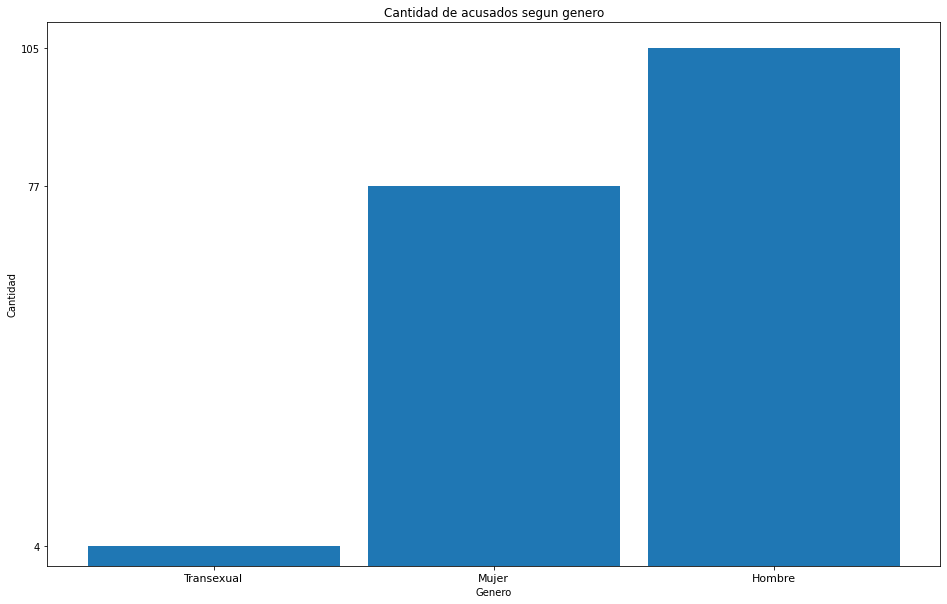

In [26]:
# Cuarto gráfico - Acusados por genero
dataAcusados = (acusadoPorGenero(data))
y_values = []
x_values = []
for i in dataAcusados.keys():
    y_values.append(dataAcusados[i])
    x_values.append(i)
x_values= np.flip(x_values)
y_values.reverse()
plt5.figure(figsize=(16,10))
plt5.bar(x_values,y_values, width=0.9)
plt5.xticks(x_values,fontsize=11)
plt5.yticks(y_values)
plt5.title('Cantidad de acusados segun genero')
plt5.xlabel('Genero')
plt5.ylabel('Cantidad')
plt5.show()

5- ¿De qué género suelen ser las vicimas?

Al realizar el siguiente gráfico podemos concluir en que la gran mayoría de las víctimas directas e indirectas
son mujeres. Si bien la cantidad de denuncias realizadas de personas transexuales son pocas,
hay una gran diferencia en los acusados con respecto a las víctimas, siendo cuatro veces mas en los
acusados que en las víctimas. Esto lo podemos observar en los ultimos tres gráficos.

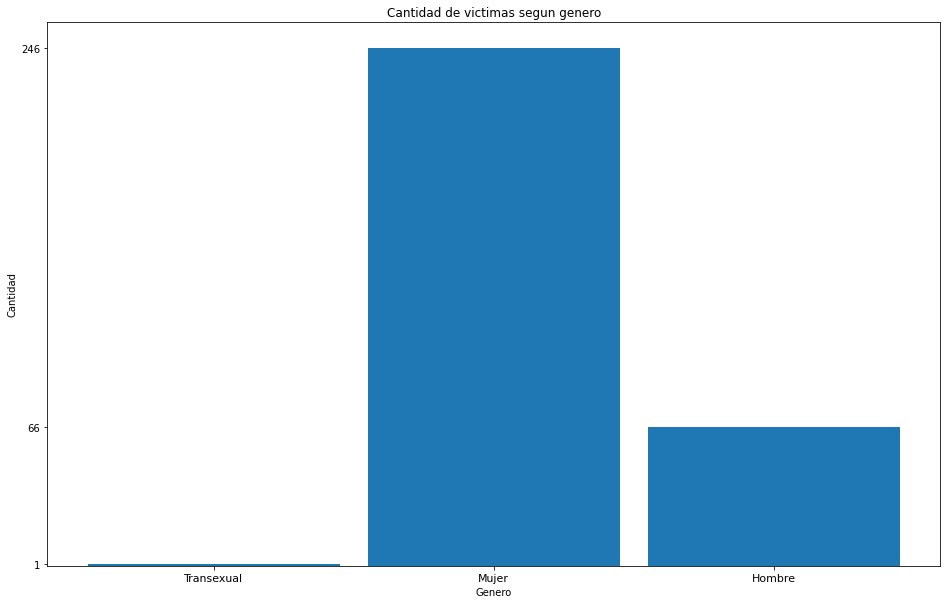

In [27]:
# Quinto gráfico - Victimas por genero
dataVictimas = (victimaPorGenero(data))
y_values = []
x_values = []

for i in dataVictimas.keys():
    y_values.append(dataVictimas[i])
    x_values.append(i)
x_values= np.flip(x_values)
y_values.reverse()
plt2.figure(figsize=(16,10))
plt2.bar(x_values,y_values, width=0.9)
plt2.xticks(x_values,fontsize=11)
plt2.yticks(y_values)
plt2.title('Cantidad de victimas segun genero')
plt2.xlabel('Genero')
plt2.ylabel('Cantidad')
plt2.show()

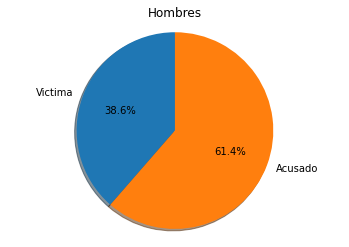

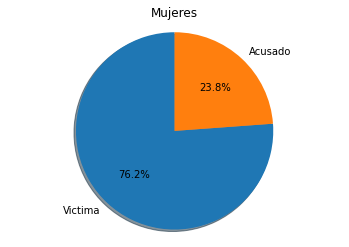

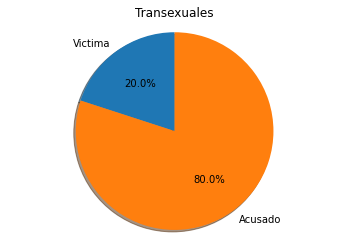

In [28]:
x_torta = ['Victima','Acusado']

vHombres = [dataVictimas['Hombre'], dataAcusados['Hombre']]
vMujeres = [dataVictimas['Mujer'], dataAcusados['Mujer']]
vTrans = [dataVictimas['Transexual'], dataAcusados['Transexual']]

fig1, ax1 = plt6.subplots()
ax1.pie(vHombres, labels=x_torta, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt6.title('Hombres')
plt6.show()

fig1, ax1 = plt7.subplots()
ax1.pie(vMujeres, labels=x_torta, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt7.title('Mujeres')
plt7.show()

fig1, ax1 = plt8.subplots()
ax1.pie(vTrans, labels=x_torta, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt8.title('Transexuales')
plt8.show()